In [2]:
import cv2
import mediapipe as mp
import numpy as np
import os
import random

# Initialize MediaPipe Pose.
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Initialize MediaPipe drawing utilities.
mp_drawing = mp.solutions.drawing_utils

# Path to your image directory.
image_dir = r'dataset/newDataset/'

# Get a list of image files in the directory.
image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]

# Randomly select 10 images.
print("Selecting 10 random images from the directory...")
selected_images = random.sample(image_files, 10)
print(f"Selected images: {selected_images}")

for image_file in selected_images:
    image_path = os.path.join(image_dir, image_file)
    print(f"Processing image: {image_path}")
    
    # Read the image.
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error reading image {image_path}")
        continue
    print(f"Successfully read image: {image_path}")

    # Convert the BGR image to RGB.
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print("Converted image from BGR to RGB.")

    # Process the image and detect pose landmarks.
    results = pose.process(rgb_image)
    print("Processed image for pose landmarks.")

    if results.pose_landmarks:
        print("Pose landmarks detected.")
        # Draw pose landmarks on the image.
        annotated_image = image.copy()
        mp_drawing.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
            mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
        )

        # Display the output.
        cv2.imshow('Pose Detection', annotated_image)
        print("Displaying annotated image.")
        cv2.waitKey(0)  # Press any key to continue.
    else:
        print(f"No pose detected in {image_path}")

print("All images processed.")
cv2.destroyAllWindows()

cv2.destroyAllWindows()


No pose detected in dataset/newDataset/sit_0000130_r_.png
No pose detected in dataset/newDataset/stand_0000084_r_.png


Loading image from path: dataset/newDataset/sit_0000002_r_.png
Successfully loaded image: dataset/newDataset/sit_0000002_r_.png
Converting image from BGR to RGB.
Processing image for pose landmarks.
Pose landmarks detected.
Number of landmarks detected: 33
Left Shoulder: (0.7684237360954285, 0.30101847648620605, -0.5498108863830566)
Right Shoulder: (0.47974836826324463, 0.2611235976219177, -0.1366076022386551)
Calculated Neck Coordinates: (540, 365)
Nose Coordinates: (513, 244)
Left Hip: (0.6995688676834106, 0.5533623695373535, -0.2011619359254837)
Right Hip: (0.5404202938079834, 0.5311847925186157, 0.200685515999794)
Calculated Hip Coordinates: (536, 704)
Calculated Neck Angle: 9.716530011381304 degrees
Drew neck point on the image.
Drew nose point on the image.
Drew hip midpoint on the image.
Drew lines from neck to nose and from hip midpoint to neck.
Displayed neck angle on the image.


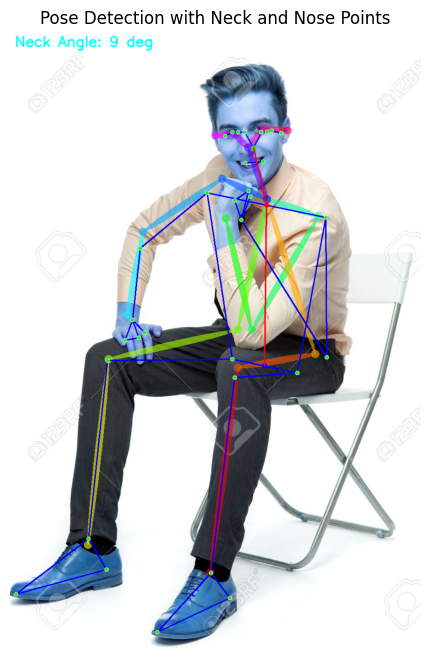

Processing complete.


In [7]:
import cv2
import mediapipe as mp
import numpy as np
import math
import matplotlib.pyplot as plt

# Initialize MediaPipe Pose.
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Initialize MediaPipe drawing utilities.
mp_drawing = mp.solutions.drawing_utils

# Load the image.
image_path = r'dataset/newDataset/sit_0000002_r_.png'
print(f"Loading image from path: {image_path}")
image = cv2.imread(image_path)
if image is None:
    print(f"Error reading image {image_path}")
else:
    print(f"Successfully loaded image: {image_path}")

    # Convert the BGR image to RGB.
    print("Converting image from BGR to RGB.")
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image and detect pose landmarks.
    print("Processing image for pose landmarks.")
    results = pose.process(rgb_image)

    if results.pose_landmarks:
        print("Pose landmarks detected.")
        # Extract landmark coordinates.
        landmarks = results.pose_landmarks.landmark
        print(f"Number of landmarks detected: {len(landmarks)}")

        # Get coordinates of left and right shoulders.
        left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER]
        right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER]
        print(f"Left Shoulder: ({left_shoulder.x}, {left_shoulder.y}, {left_shoulder.z})")
        print(f"Right Shoulder: ({right_shoulder.x}, {right_shoulder.y}, {right_shoulder.z})")

        # Calculate the neck coordinates as the midpoint between shoulders.
        neck_x = (left_shoulder.x + right_shoulder.x) / 2
        neck_y = (left_shoulder.y + right_shoulder.y) / 2
        neck_z = (left_shoulder.z + right_shoulder.z) / 2
        neck_coords = (int(neck_x * image.shape[1]), int(neck_y * image.shape[0]))
        print(f"Calculated Neck Coordinates: {neck_coords}")

        # Get coordinates of the nose.
        nose = landmarks[mp_pose.PoseLandmark.NOSE]
        nose_coords = (int(nose.x * image.shape[1]), int(nose.y * image.shape[0]))
        print(f"Nose Coordinates: {nose_coords}")

        # Get coordinates of left and right hips.
        left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP]
        right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP]
        print(f"Left Hip: ({left_hip.x}, {left_hip.y}, {left_hip.z})")
        print(f"Right Hip: ({right_hip.x}, {right_hip.y}, {right_hip.z})")

        # Calculate the midpoint between hips.
        hip_x = (left_hip.x + right_hip.x) / 2
        hip_y = (left_hip.y + right_hip.y) / 2
        hip_z = (left_hip.z + right_hip.z) / 2
        hip_coords = (int(hip_x * image.shape[1]), int(hip_y * image.shape[0]))
        print(f"Calculated Hip Coordinates: {hip_coords}")

        # Calculate the angle between the neck and the line connecting the midpoint of the hips.
        def calculate_angle(point1, point2, vertex):
            a = np.array(point1)
            b = np.array(vertex)
            c = np.array(point2)

            ba = a - b
            bc = c - b

            cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
            angle = np.arccos(cosine_angle)
            return np.degrees(angle)

        neck_angle = calculate_angle(hip_coords, neck_coords, nose_coords)
        print(f"Calculated Neck Angle: {neck_angle} degrees")

        # Draw landmarks and connections.
        annotated_image = image.copy()
        mp_drawing.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
            mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
        )

        # Draw the neck point.
        cv2.circle(annotated_image, neck_coords, 5, (255, 0, 0), -1)
        print("Drew neck point on the image.")

        # Draw the nose point.
        cv2.circle(annotated_image, nose_coords, 5, (0, 255, 0), -1)
        print("Drew nose point on the image.")

        # Draw the hip midpoint.
        cv2.circle(annotated_image, hip_coords, 5, (0, 0, 255), -1)
        print("Drew hip midpoint on the image.")

        # Draw lines from neck to nose and from hip midpoint to neck.
        cv2.line(annotated_image, neck_coords, nose_coords, (255, 0, 0), 2)
        cv2.line(annotated_image, hip_coords, neck_coords, (255, 0, 0), 2)
        print("Drew lines from neck to nose and from hip midpoint to neck.")

        # Display the angle on the image.
        cv2.putText(annotated_image, f'Neck Angle: {int(neck_angle)} deg', (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)
        print("Displayed neck angle on the image.")

        # Use Matplotlib to show the output image.
        plt.figure(figsize=(10, 8))
        plt.imshow(annotated_image)
        plt.axis('off')  # Hide axes
        plt.title('Pose Detection with Neck and Nose Points')
        plt.show()
    else:
        print(f"No pose detected in {image_path}")

print("Processing complete.")